# Image Processing Module 6: The Power of Thresholds pt. 2

### Purpose: To introduce more advanced Thresholding techniques and binarization

*Step 1: Import Necessary Packages*

In [1]:
import numpy as np
from skimage import io

import matplotlib.pyplot as plt

*Step 2: User Inputs*

In [2]:
#replace the example path from my computer with the path to the image on your computer

cell_im_location = r'C:\Users\Kaleb\Documents\GitHub\textile\example_data\ogd_cells.tif'

*Step 3: Read in the image*

In [3]:
cell_im = io.imread(cell_im_location)

*Step 4: Viewing the Image*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


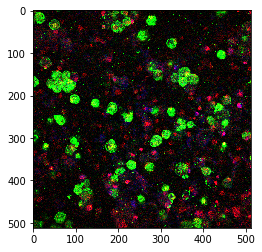

In [4]:
plt.imshow(cell_im)

*Step 5: Splitting our channels for Thresholding*

In [5]:
red_cell_im = cell_im[:,:,0]
green_cell_im = cell_im[:,:,1]
blue_cell_im = cell_im[:,:,2]

*Step 6: A specific Import*

In [6]:
import skimage.filters

In [7]:
Six Types of Thresholds: 
1. Histogram Shape
2. Clustering
3. Entropy
4. Object Attribute
5. Spatial
6. Local 

SyntaxError: invalid syntax (<ipython-input-7-3f8ea2d0e434>, line 1)

*Step 7: Scikit Image Thresholding Methods*

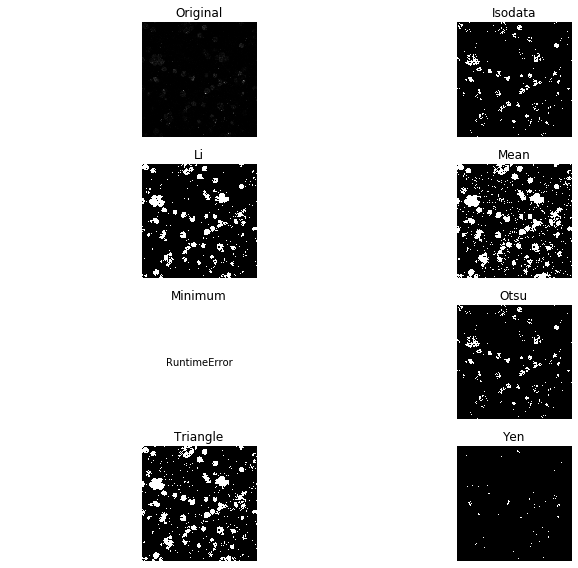

In [8]:
fig, ax = skimage.filters.try_all_threshold(green_cell_im, figsize=(10, 8), verbose=False)
plt.show()

*Step 8: Histogram based method*

In [9]:
thresh_otsu = skimage.filters.threshold_otsu(green_cell_im)
binary_otsu = green_cell_im > thresh_otsu

In [10]:
binary_otsu

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

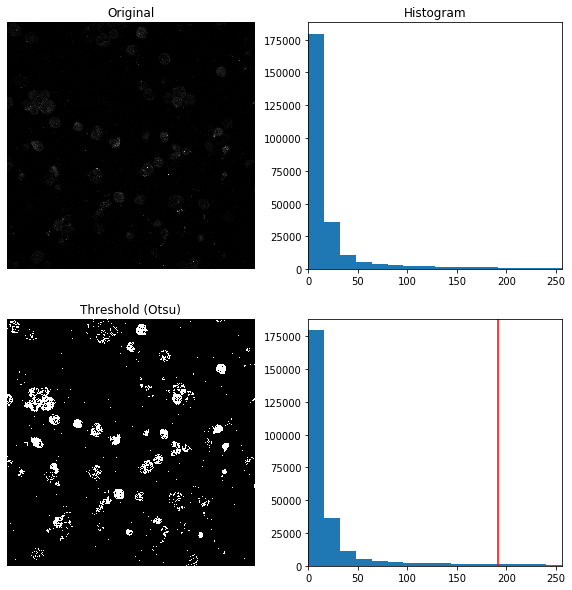

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0, 1].set_xlim((0,256))

ax[1, 0].imshow(binary_otsu, cmap='gray')
ax[1, 0].set_title('Threshold (Otsu)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_otsu, color='r')
ax[1, 1].set_xlim((0,256))

for a in ax[:,0]:
    a.axis('off')
plt.show()

In [12]:
thresh_otsu

191

In [13]:
green_cell_im

array([[ 25, 101,  65, ...,  16,  11,   0],
       [122, 136,  74, ...,  14,   8,  11],
       [ 29,  84, 111, ...,  22,   0,  15],
       ...,
       [ 22, 140,  78, ...,  11,   7,   0],
       [ 80,  59, 102, ...,   8,  11,  15],
       [ 27,  52,  27, ...,   0,   1,   0]], dtype=uint16)

In [14]:
binary_otsu

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

*Step 9: Local Threshold*

In [24]:
block_size = 111

thresh_local = skimage.filters.threshold_local(green_cell_im, block_size)
binary_local = green_cell_im > thresh_local

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

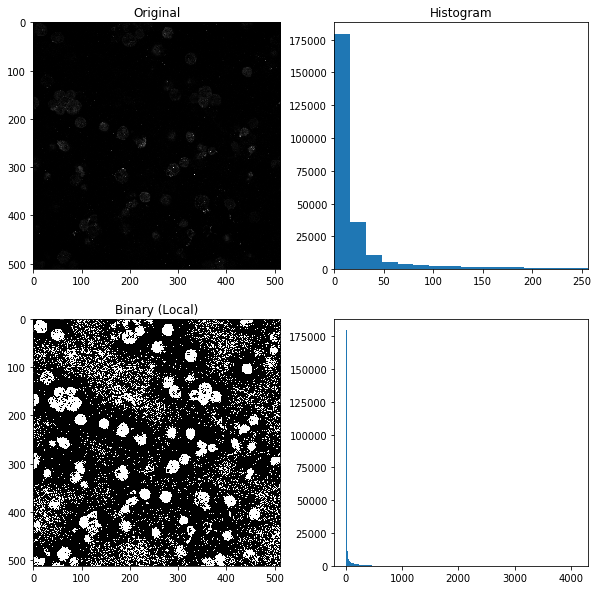

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

ax[0, 0].imshow(green_cell_im, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(green_cell_im.ravel(), bins=256)
ax[0, 1].set_title('Histogram')
ax[0, 1].set_xlim((0,256))

ax[1, 0].imshow(binary_local, cmap='gray')
ax[1, 0].set_title('Binary (Local)')

ax[1, 1].hist(green_cell_im.ravel(), bins=256)
ax[1, 1].axvline(thresh_local, color='r')
ax[1, 0].set_title('Threshold (Local)')
ax[1, 1].set_xlim((0,256))

for a in ax[:,0]:
    a.axis('off')
plt.show()

In [ ]:
thresh_local

In [22]:
binary_local

array([[False,  True, False, ...,  True,  True, False],
       [ True,  True, False, ...,  True, False,  True],
       [False,  True,  True, ...,  True, False,  True],
       ...,
       [False,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])

*Recall Practice*

Practice with different layers of thresholding